# plots of article

## libaries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, LeakyReLU, Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pywt
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import mean_squared_error
import math
from re import S
import wfdb
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
import math
from scipy import signal
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import mean_squared_error
# Imports
import os
import glob
import numpy as np
from scipy.signal import resample_poly
import wfdb
import math
import _pickle as pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization,concatenate, Activation, Input, Conv2DTranspose, Lambda, LSTM, Reshape, Embedding

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
# model with leakyrelu +self attenuation + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU
from tensorflow.keras.models import Model
#model with residual and deleteing strides for solving output dimention problem
from keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, Input, Add
# first  **Reinforcement Learning Agent** method at the end it is developed
import keras
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from keras import losses
from datetime import datetime
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU

from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv1DTranspose
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Add, Multiply, UpSampling1D
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv2DTranspose
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose
from tensorflow.keras.models import Model
###############################################################################
#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import model_from_json
import glob
import wfdb
import numpy as np
import math
from scipy.signal import resample_poly
import pickle
from keras.models import Sequential
from keras.layers import LSTM, Dense

# snr fucntion

In [2]:
import numpy as np

def calculate_snr(clean_signal, noisy_signal):
    # Convert lists to numpy arrays for easier calculations
    clean_signal = np.array(clean_signal)
    noisy_signal = np.array(noisy_signal)
    
    # Calculate power of the clean signal
    P_signal = np.mean(clean_signal**2)
    
    # Calculate noise signal
    noise_signal = noisy_signal - clean_signal
    
    # Calculate power of the noise
    P_noise = np.mean(noise_signal**2)
    
    # Calculate SNR in dB
    snr = 10 * np.log10(P_signal / P_noise)
    
    return snr



# snr calc

In [4]:
import os
import pickle
import pandas as pd


# Create a directory to save the Excel files if it doesn't exist
output_dir = 'snr_results'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir('../test_results'):
    print(file)
    with open(os.path.join('../test_results', file), 'rb') as input:
        test_res = pickle.load(input)
    
    noisy_signal, original_signal, prediction_signal = test_res
    
    s_input = []
    s_output = []
    s_imp = []
    
    for i in range(len(noisy_signal)):
        
        snr_input = calculate_snr(original_signal[i], noisy_signal[i])
        s_input.append(snr_input)
        snr_output = calculate_snr(original_signal[i], prediction_signal[i])
        s_output.append(snr_output)
        snr_imp = snr_output - snr_input
        s_imp.append(snr_imp)
    
    # Create a DataFrame to hold the results
    df = pd.DataFrame({
        'SNR Input': s_input,
        'SNR Output': s_output,
        'SNR Improvement': s_imp
    })
    
    # Save the DataFrame to an Excel file with the model name
    model_name = os.path.splitext(file)[0]  # Get the model name without extension
    excel_file_path = os.path.join(output_dir, f'{model_name}.xlsx')
    df.to_excel(excel_file_path, index=False)
    print(f'Saved SNR results to {excel_file_path}')


DRNN.pkl
Saved SNR results to snr_results\DRNN.xlsx
FCN_DAE_ref.pkl
Saved SNR results to snr_results\FCN_DAE_ref.xlsx
FCN_DAE_RES.pkl
Saved SNR results to snr_results\FCN_DAE_RES.xlsx
FCN_DAE_withoutresidual.pkl
Saved SNR results to snr_results\FCN_DAE_withoutresidual.xlsx


Columns in DRNN.xlsx: ['SNR Input', 'SNR Output', 'SNR Improvement']
Columns in FCN_DAE_ref.xlsx: ['SNR Input', 'SNR Output', 'SNR Improvement']
Columns in FCN_DAE_RES.xlsx: ['SNR Input', 'SNR Output', 'SNR Improvement']
Columns in FCN_DAE_withoutresidual.xlsx: ['SNR Input', 'SNR Output', 'SNR Improvement']


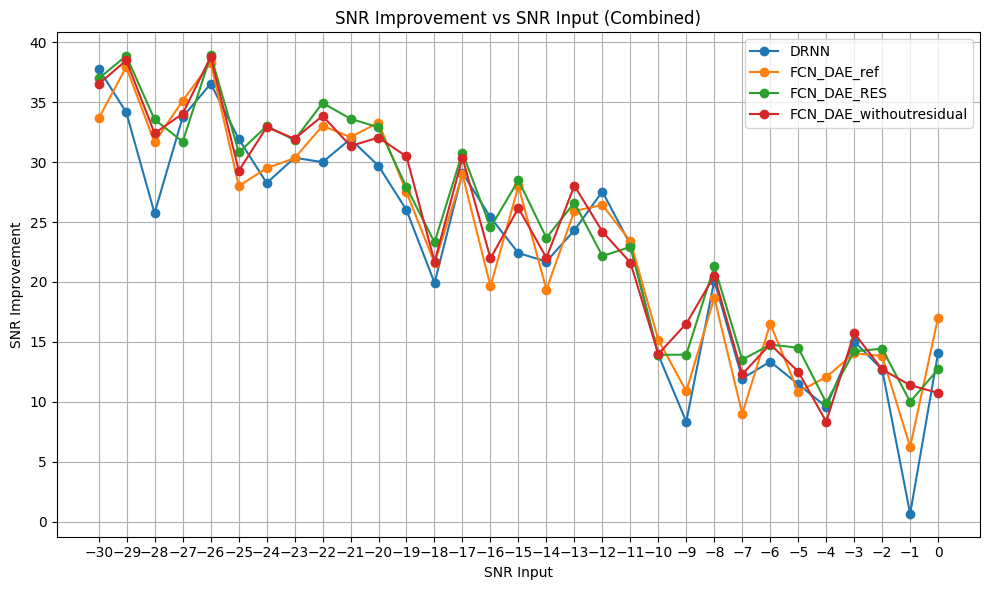

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Excel files
output_dir = 'snr_results'

# Create a figure for all plots
plt.figure(figsize=(10, 6))

# Loop through each Excel file in the output directory
for file in os.listdir(output_dir):
    if file.endswith('.xlsx'):
        excel_file_path = os.path.join(output_dir, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(excel_file_path)
        
        # Print the column names for debugging
        print(f"Columns in {file}: {df.columns.tolist()}")
        
        # Create a list of desired SNR inputs from 0 to -30
        desired_snr_inputs = list(range(0, -31, -1))
        
        # Initialize a list to collect sampled data
        sampled_data = []
        
        # Loop through the desired SNR inputs and find the closest matches
        for snr_input in desired_snr_inputs:
            # Find the closest SNR input in the DataFrame
            closest_row = df.iloc[(df['SNR Input'] - snr_input).abs().argsort()[:1]]
            if not closest_row.empty:
                sampled_data.append({
                    'SNR Input': closest_row['SNR Input'].values[0],
                    'SNR Improvement': closest_row['SNR Improvement'].values[0]
                })
        
        # Convert sampled data to a DataFrame
        sampled_df = pd.DataFrame(sampled_data)
        
        # Check if sampled_df is empty
        if sampled_df.empty:
            print(f"No data sampled for {file}.")
            continue
        
        # Plot SNR Improvement vs SNR Input for the sampled data
        plt.plot(sampled_df['SNR Input'], sampled_df['SNR Improvement'], 
                 marker='o', linestyle='-', label=file[:-5])  # Use file name as label

# Customize the plot
plt.title('SNR Improvement vs SNR Input (Combined)')
plt.xlabel('SNR Input')
plt.ylabel('SNR Improvement')
plt.xticks(range(-30, 1, 1))  # Set x-ticks from -30 to 0
plt.grid()
plt.legend()  # Show legend to identify different models
plt.tight_layout()
plt.show()



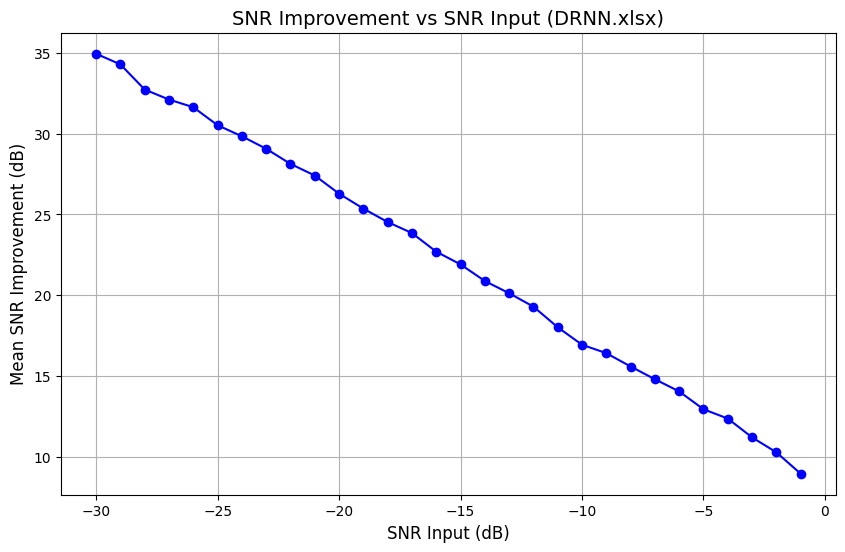

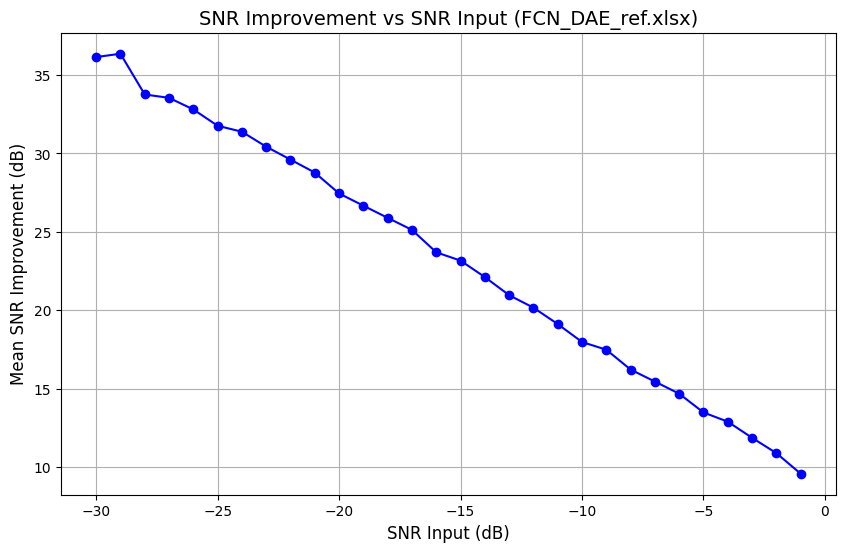

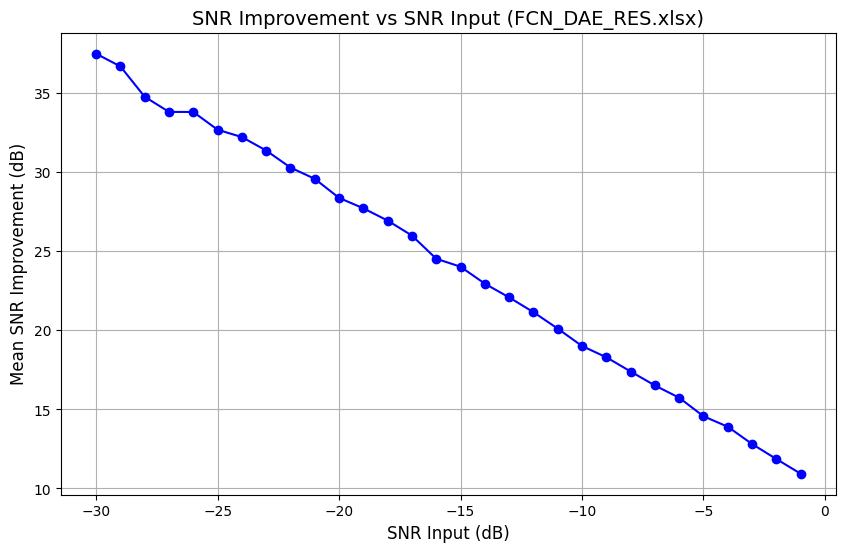

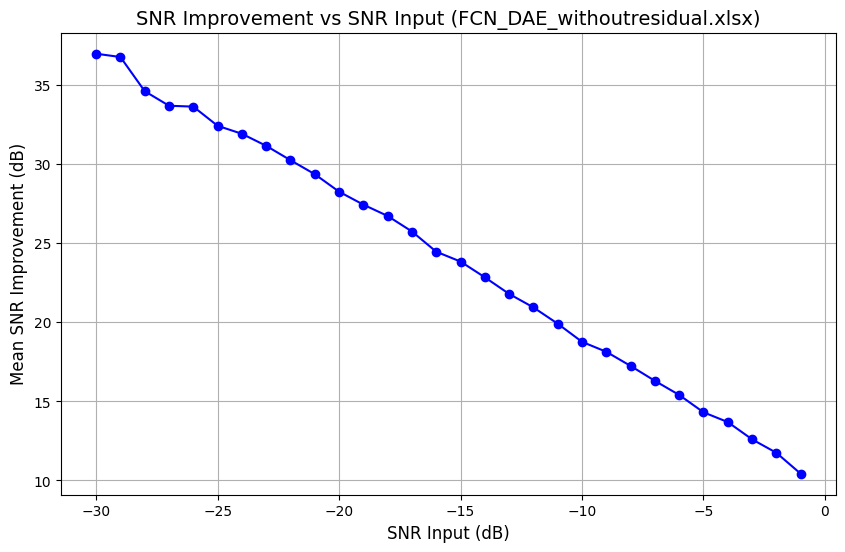

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "snr_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Process each Excel file and create a separate plot
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["SNR Improvement"].mean()
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(mean_improvement.index.astype(int), mean_improvement, marker='o', linestyle='-', color='b')
        plt.title(f"SNR Improvement vs SNR Input ({file})", fontsize=14)
        plt.xlabel("SNR Input (dB)", fontsize=12)
        plt.ylabel("Mean SNR Improvement (dB)", fontsize=12)
        plt.grid(True)
        
        # Save the plot
        plt.show()
        plt.close()


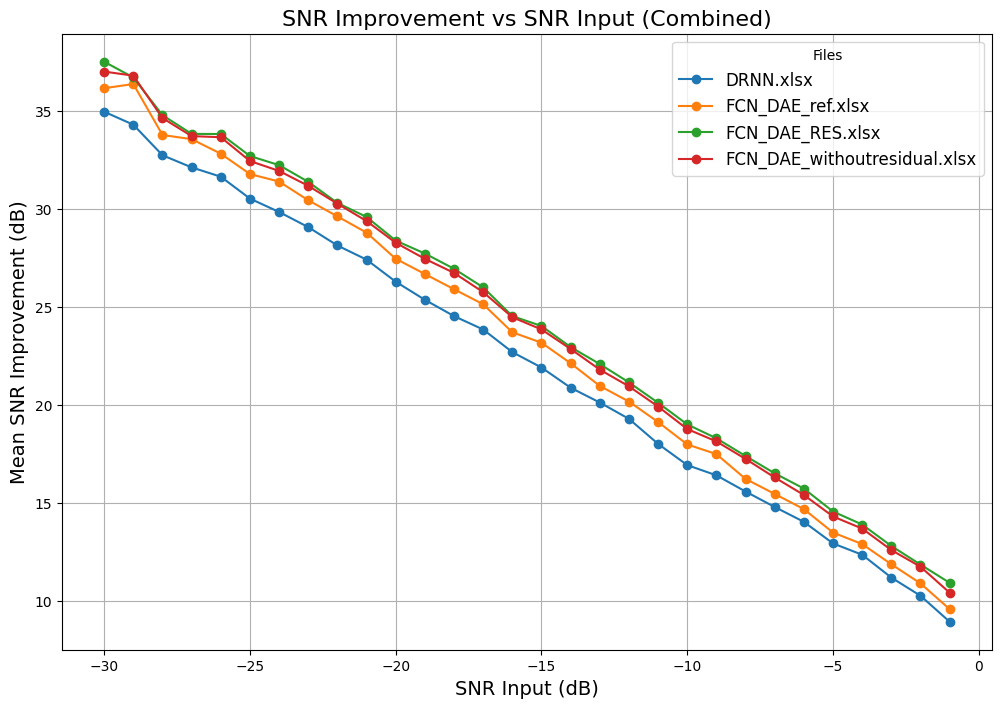

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "snr_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Initialize a figure for the combined plot
plt.figure(figsize=(12, 8))

# Process each Excel file and overlay plots
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["SNR Improvement"].mean()
        
        # Plot the data with a unique label
        plt.plot(
            mean_improvement.index.astype(int), 
            mean_improvement, 
            marker='o', linestyle='-', label=file
        )

# Add title, labels, legend, and grid
plt.title("SNR Improvement vs SNR Input (Combined)", fontsize=16)
plt.xlabel("SNR Input (dB)", fontsize=14)
plt.ylabel("Mean SNR Improvement (dB)", fontsize=14)
plt.legend(title="Files", fontsize=12)
plt.grid(True)

# Show the combined plot
plt.show()


In [8]:
import numpy as np

def rmse(signal1, signal2):
    """
    Calculate the Root Mean Square Error (RMSE) between two signals.

    Parameters:
    signal1 (array-like): First signal.
    signal2 (array-like): Second signal.

    Returns:
    float: The RMSE value.
    """
    # Ensure the signals are numpy arrays
    signal1 = np.array(signal1)
    signal2 = np.array(signal2)
    
    # Calculate RMSE
    return np.sqrt(np.mean((signal1 - signal2) ** 2))

In [14]:
import os
import pickle
import pandas as pd

# Create a directory to save the Excel files if it doesn't exist

output_dir = 'rmse_results'
os.makedirs(output_dir, exist_ok=True)
for file in os.listdir('../test_results'):
    print(file)
    with open(os.path.join('../test_results', file), 'rb') as input:
        test_res = pickle.load(input)
    noisy_signal, original_signal, prediction_signal = test_res
    s_input = []
    rmse_val=[]    
    for i in range(len(noisy_signal)):
            snr_input = calculate_snr(original_signal[i], noisy_signal[i])
            s_input.append(snr_input)
        
            rm=rmse(original_signal[i], prediction_signal[i])
            rmse_val.append(rm)
    
    # Create a DataFrame to hold the results
    df = pd.DataFrame({
        'SNR Input': s_input,
        'RMSE': rmse_val
    })
    
    # Save the DataFrame to an Excel file with the model name
    model_name = os.path.splitext(file)[0]  # Get the model name without extension
    excel_file_path = os.path.join(output_dir, f'{model_name}.xlsx')
    df.to_excel(excel_file_path, index=False)
    print(f'Saved SNR results to {excel_file_path}')


DRNN.pkl
Saved SNR results to rmse_results\DRNN.xlsx
FCN_DAE_ref.pkl
Saved SNR results to rmse_results\FCN_DAE_ref.xlsx
FCN_DAE_RES.pkl
Saved SNR results to rmse_results\FCN_DAE_RES.xlsx
FCN_DAE_withoutresidual.pkl
Saved SNR results to rmse_results\FCN_DAE_withoutresidual.xlsx


Columns in DRNN.xlsx: ['SNR Input', 'RMSE']
Columns in FCN_DAE_ref.xlsx: ['SNR Input', 'RMSE']
Columns in FCN_DAE_RES.xlsx: ['SNR Input', 'RMSE']
Columns in FCN_DAE_withoutresidual.xlsx: ['SNR Input', 'RMSE']


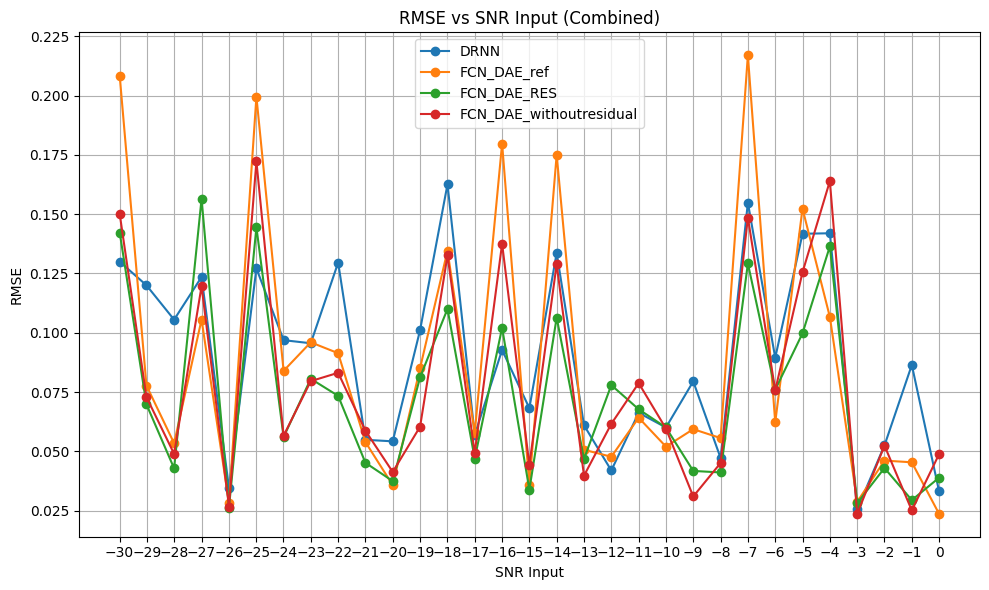

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Excel files
output_dir = 'RMSE_results'

# Create a figure for all plots
plt.figure(figsize=(10, 6))

# Loop through each Excel file in the output directory
for file in os.listdir(output_dir):
    if file.endswith('.xlsx'):
        excel_file_path = os.path.join(output_dir, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(excel_file_path)
        
        # Print the column names for debugging
        print(f"Columns in {file}: {df.columns.tolist()}")
        
        # Create a list of desired SNR inputs from 0 to -30
        desired_snr_inputs = list(range(0, -31, -1))
        
        # Initialize a list to collect sampled data
        sampled_data = []
        
        # Loop through the desired SNR inputs and find the closest matches
        for snr_input in desired_snr_inputs:
            # Find the closest SNR input in the DataFrame
            closest_row = df.iloc[(df['SNR Input'] - snr_input).abs().argsort()[:1]]
            if not closest_row.empty:
                sampled_data.append({
                    'SNR Input': closest_row['SNR Input'].values[0],
                    'RMSE': closest_row['RMSE'].values[0]
                })
        
        # Convert sampled data to a DataFrame
        sampled_df = pd.DataFrame(sampled_data)
        
        # Check if sampled_df is empty
        if sampled_df.empty:
            print(f"No data sampled for {file}.")
            continue
        
        # Plot SNR Improvement vs SNR Input for the sampled data
        plt.plot(sampled_df['SNR Input'], sampled_df['RMSE'], 
                 marker='o', linestyle='-', label=file[:-5])  # Use file name as label

# Customize the plot
plt.title('RMSE vs SNR Input (Combined)')
plt.xlabel('SNR Input')
plt.ylabel('RMSE')
plt.xticks(range(-30, 1, 1))  # Set x-ticks from -30 to 0
plt.grid()
plt.legend()  # Show legend to identify different models
plt.tight_layout()
plt.show()




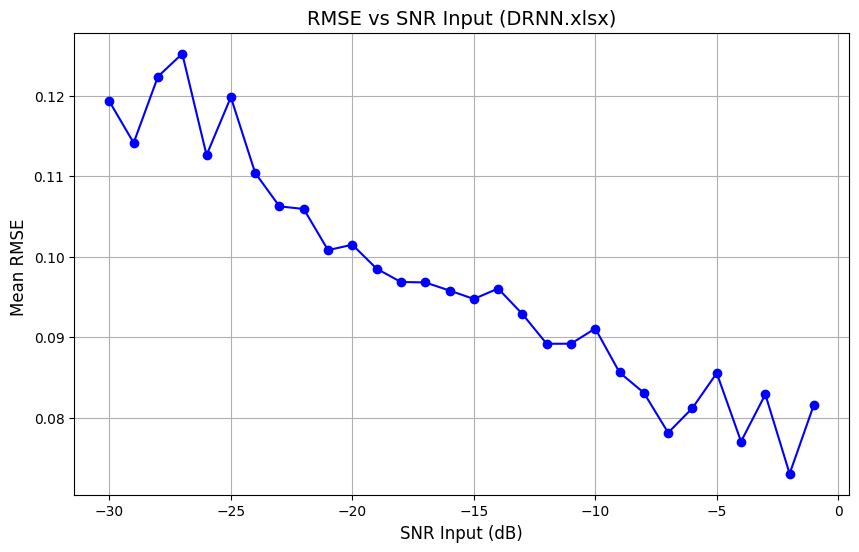

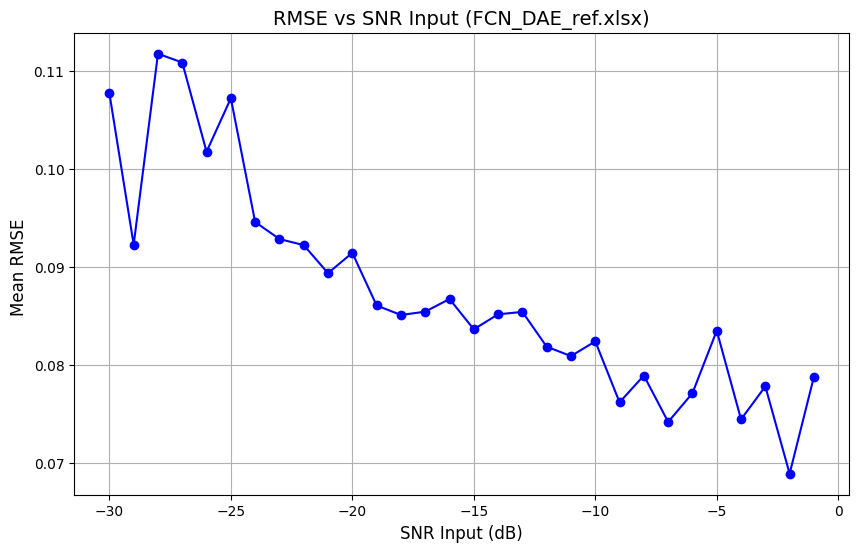

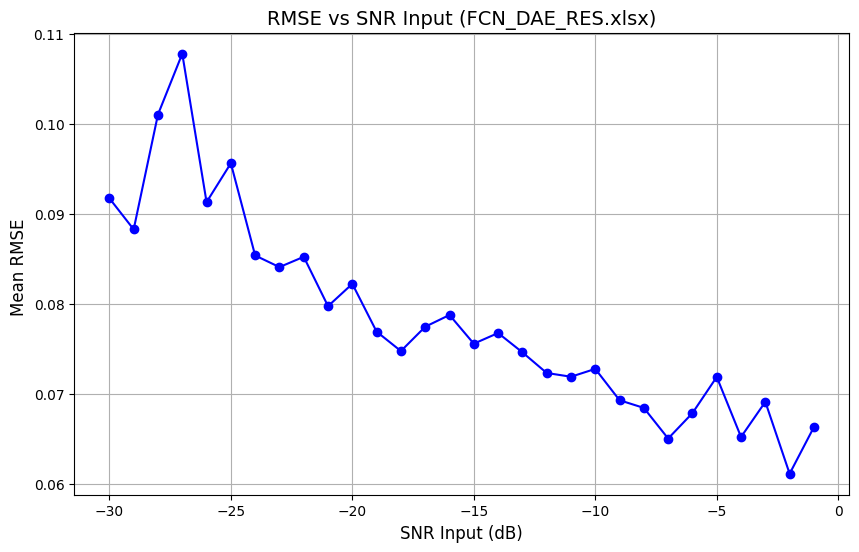

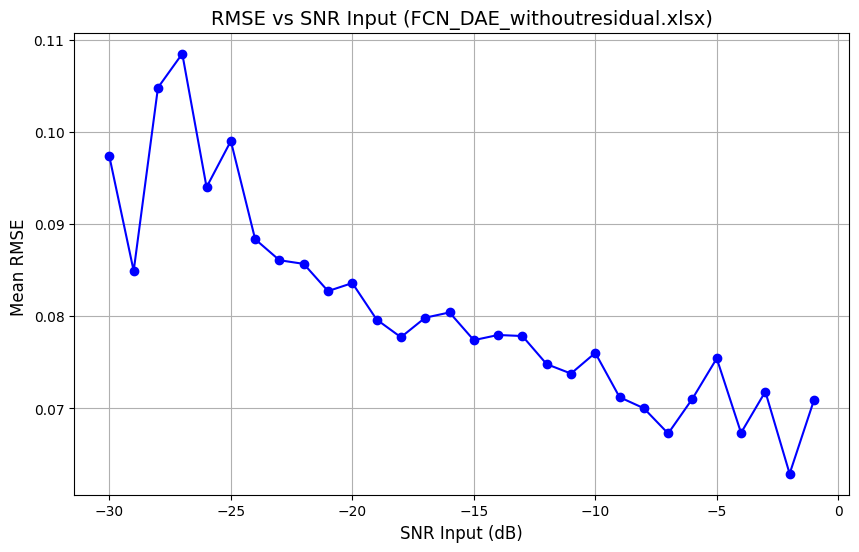

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "RMSE_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Process each Excel file and create a separate plot
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["RMSE"].mean()
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(mean_improvement.index.astype(int), mean_improvement, marker='o', linestyle='-', color='b')
        plt.title(f"RMSE vs SNR Input ({file})", fontsize=14)
        plt.xlabel("SNR Input (dB)", fontsize=12)
        plt.ylabel("Mean RMSE ", fontsize=12)
        plt.grid(True)
        
        # Save the plot
        plt.show()
        plt.close()


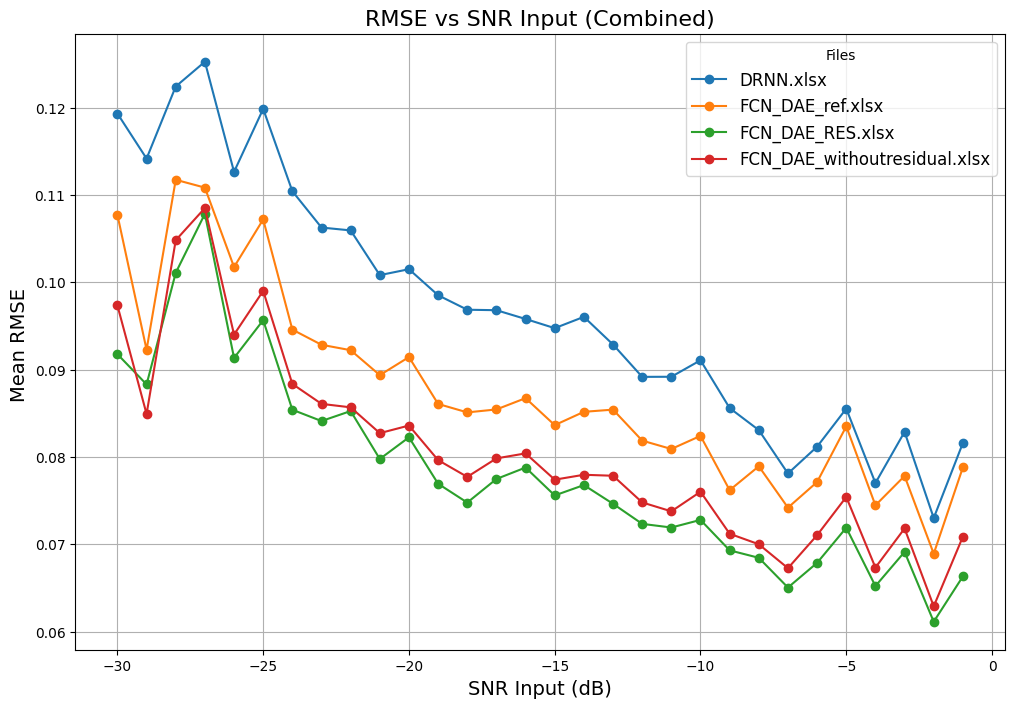

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "rmse_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Initialize a figure for the combined plot
plt.figure(figsize=(12, 8))

# Process each Excel file and overlay plots
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["RMSE"].mean()
        
        # Plot the data with a unique label
        plt.plot(
            mean_improvement.index.astype(int), 
            mean_improvement, 
            marker='o', linestyle='-', label=file
        )

# Add title, labels, legend, and grid
plt.title("RMSE vs SNR Input (Combined)", fontsize=16)
plt.xlabel("SNR Input (dB)", fontsize=14)
plt.ylabel("Mean RMSE ", fontsize=14)
plt.legend(title="Files", fontsize=12)
plt.grid(True)

# Show the combined plot
plt.show()


In [19]:
import numpy as np

def prd(reference_signal, test_signal):
    """
    Calculate the Percentage Root Mean Square Difference (PRD) between two signals.
    
    Args:
        reference_signal (numpy array): The reference signal (clean signal).
        test_signal (numpy array): The signal to compare (noisy or predicted).
        
    Returns:
        float: PRD value as a percentage.
    """
    # Calculate the numerator (RMSE part)
    numerator = np.sqrt(np.sum((test_signal - reference_signal)**2))
    
    # Calculate the denominator (reference signal power)
    denominator = np.sqrt(np.sum(reference_signal**2))
    
    # Avoid division by zero
    if denominator == 0:
        return float('inf')  # Undefined PRD for zero reference signal
    
    # Calculate PRD as a percentage
    prd_val = 100 * (numerator / denominator)
    return prd_val




In [20]:
import os
import pickle
import pandas as pd

# Create a directory to save the Excel files if it doesn't exist

output_dir = 'prd_results'
os.makedirs(output_dir, exist_ok=True)
for file in os.listdir('../test_results'):
    print(file)
    with open(os.path.join('../test_results', file), 'rb') as input:
        test_res = pickle.load(input)
    noisy_signal, original_signal, prediction_signal = test_res
    s_input = []
    prd_val=[]    
    for i in range(len(noisy_signal)):
            snr_input = calculate_snr(original_signal[i], noisy_signal[i])
            s_input.append(snr_input)
        
            prdd=prd(original_signal[i], prediction_signal[i])
            prd_val.append(prdd)
    
    # Create a DataFrame to hold the results
    df = pd.DataFrame({
        'SNR Input': s_input,
        'PRD': prd_val
    })
    
    # Save the DataFrame to an Excel file with the model name
    model_name = os.path.splitext(file)[0]  # Get the model name without extension
    excel_file_path = os.path.join(output_dir, f'{model_name}.xlsx')
    df.to_excel(excel_file_path, index=False)
    print(f'Saved SNR results to {excel_file_path}')


DRNN.pkl
Saved SNR results to prd_results\DRNN.xlsx
FCN_DAE_ref.pkl
Saved SNR results to prd_results\FCN_DAE_ref.xlsx
FCN_DAE_RES.pkl
Saved SNR results to prd_results\FCN_DAE_RES.xlsx
FCN_DAE_withoutresidual.pkl
Saved SNR results to prd_results\FCN_DAE_withoutresidual.xlsx


Columns in DRNN.xlsx: ['SNR Input', 'PRD']
Columns in FCN_DAE_ref.xlsx: ['SNR Input', 'PRD']
Columns in FCN_DAE_RES.xlsx: ['SNR Input', 'PRD']
Columns in FCN_DAE_withoutresidual.xlsx: ['SNR Input', 'PRD']


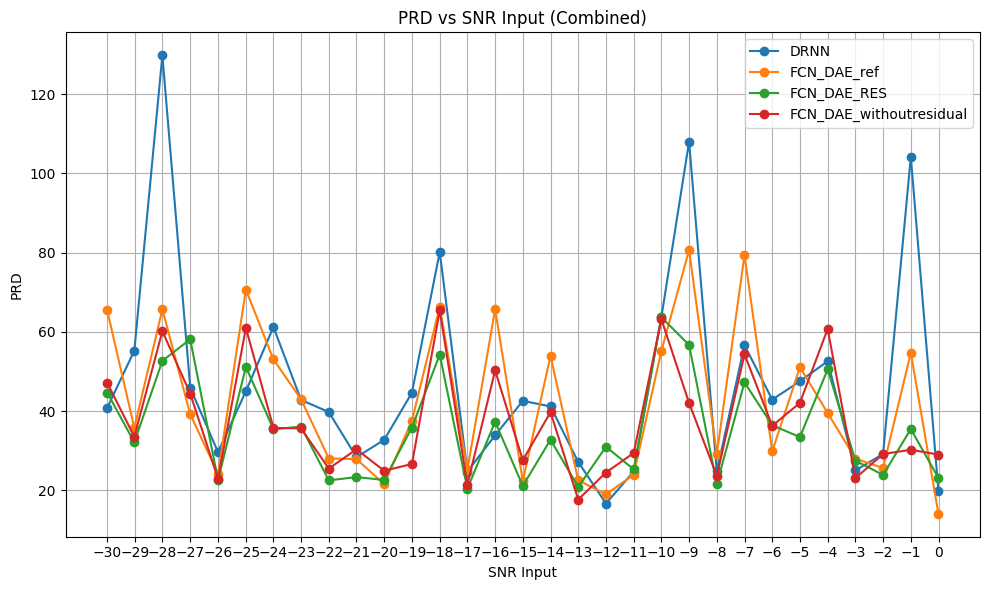

Saved combined plot to prd_results\combined_PRD_sampled_plot.png


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Excel files
output_dir = 'prd_results'

# Create a figure for all plots
plt.figure(figsize=(10, 6))

# Loop through each Excel file in the output directory
for file in os.listdir(output_dir):
    if file.endswith('.xlsx'):
        excel_file_path = os.path.join(output_dir, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(excel_file_path)
        
        # Print the column names for debugging
        print(f"Columns in {file}: {df.columns.tolist()}")
        
        # Create a list of desired SNR inputs from 0 to -30
        desired_snr_inputs = list(range(0, -31, -1))
        
        # Initialize a list to collect sampled data
        sampled_data = []
        
        # Loop through the desired SNR inputs and find the closest matches
        for snr_input in desired_snr_inputs:
            # Find the closest SNR input in the DataFrame
            closest_row = df.iloc[(df['SNR Input'] - snr_input).abs().argsort()[:1]]
            if not closest_row.empty:
                sampled_data.append({
                    'SNR Input': closest_row['SNR Input'].values[0],
                    'PRD': closest_row['PRD'].values[0]
                })
        
        # Convert sampled data to a DataFrame
        sampled_df = pd.DataFrame(sampled_data)
        
        # Check if sampled_df is empty
        if sampled_df.empty:
            print(f"No data sampled for {file}.")
            continue
        
        # Plot SNR Improvement vs SNR Input for the sampled data
        plt.plot(sampled_df['SNR Input'], sampled_df['PRD'], 
                 marker='o', linestyle='-', label=file[:-5])  # Use file name as label

# Customize the plot
plt.title('PRD vs SNR Input (Combined)')
plt.xlabel('SNR Input')
plt.ylabel('PRD')
plt.xticks(range(-30, 1, 1))  # Set x-ticks from -30 to 0
plt.grid()
plt.legend()  # Show legend to identify different models
plt.tight_layout()
plt.show()

# Save the combined plot
combined_plot_file_path = os.path.join(output_dir, 'combined_PRD_sampled_plot.png')
plt.savefig(combined_plot_file_path)
plt.close()  # Close the plot to free memory
print(f'Saved combined plot to {combined_plot_file_path}')


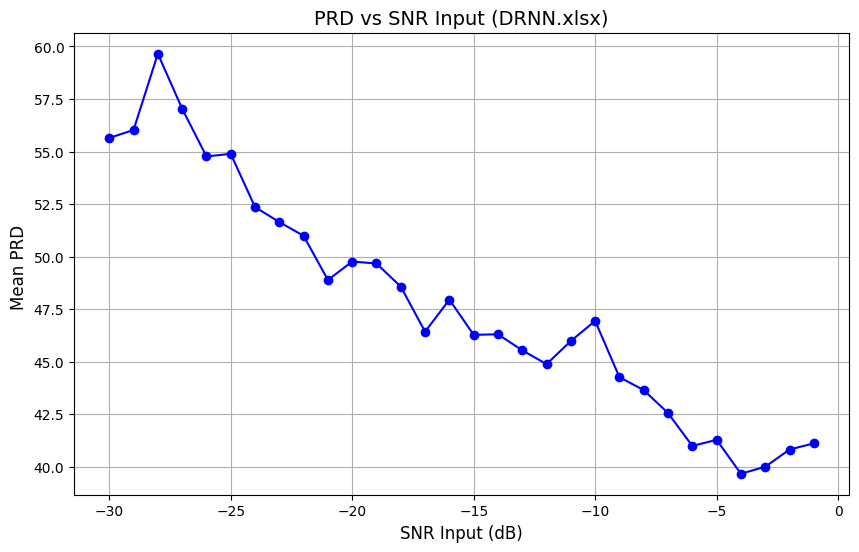

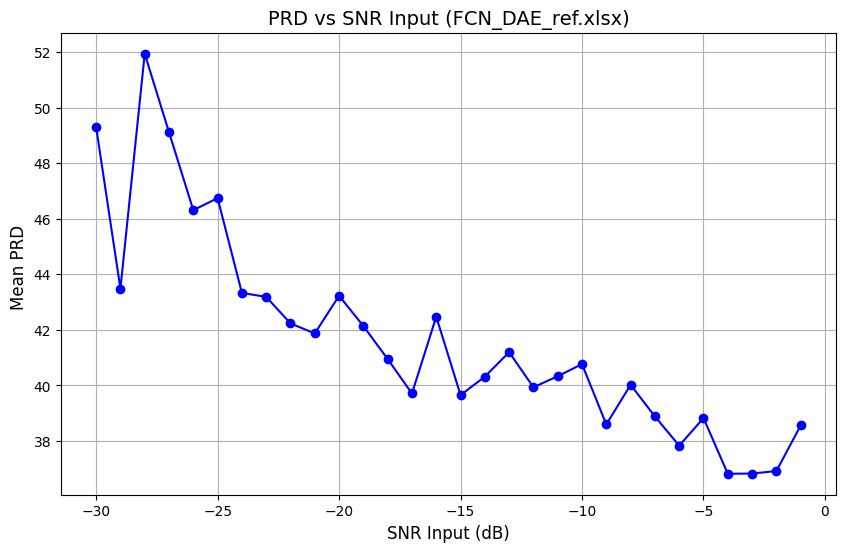

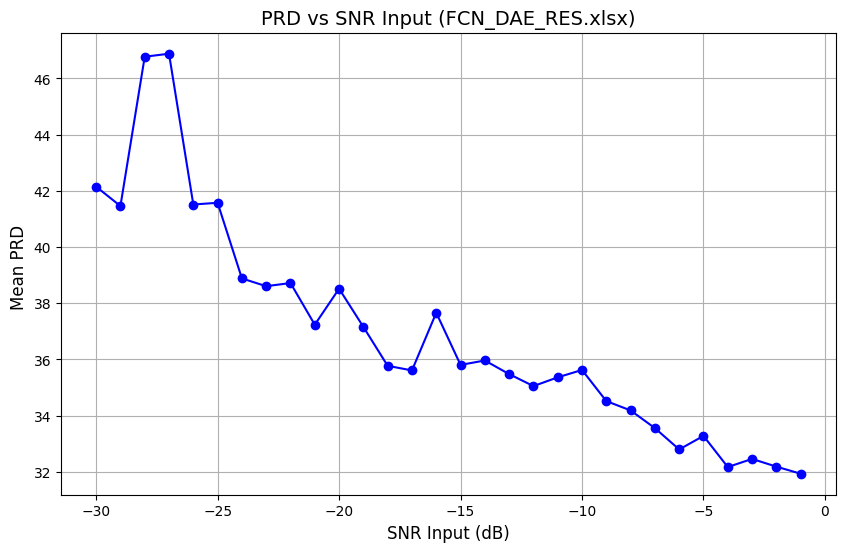

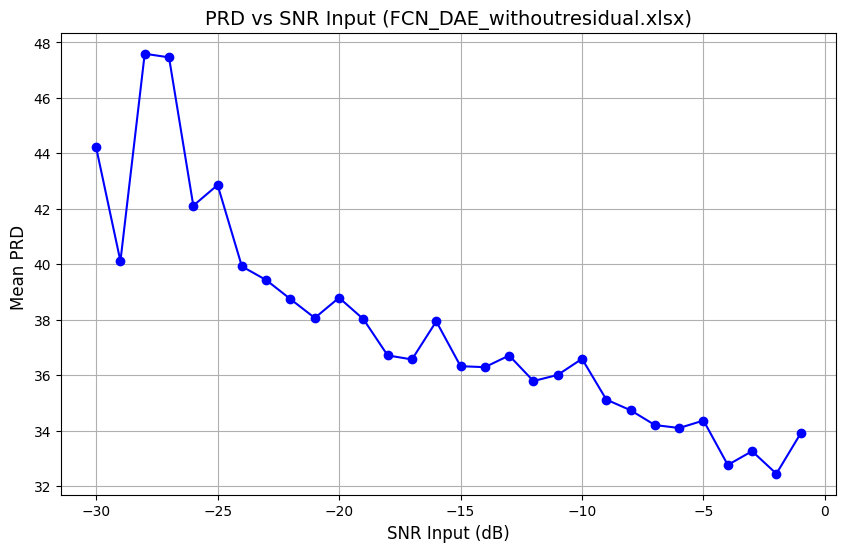

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "prd_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Process each Excel file and create a separate plot
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["PRD"].mean()
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(mean_improvement.index.astype(int), mean_improvement, marker='o', linestyle='-', color='b')
        plt.title(f"PRD vs SNR Input ({file})", fontsize=14)
        plt.xlabel("SNR Input (dB)", fontsize=12)
        plt.ylabel("Mean PRD ", fontsize=12)
        plt.grid(True)
        
        # Save the plot
        plt.show()
        plt.close()


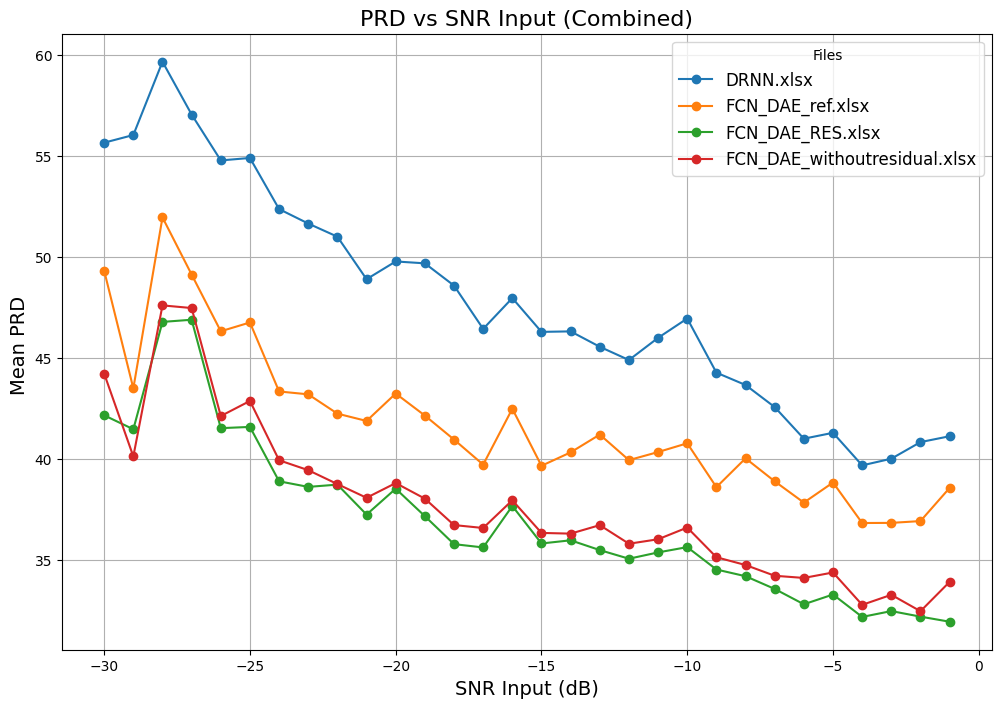

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the Excel files
results_dir = "prd_results"

# Define the SNR Input range (-30 to 0) and bin width (1)
snr_bins = np.arange(-30, 1, 1)

# Initialize a figure for the combined plot
plt.figure(figsize=(12, 8))

# Process each Excel file and overlay plots
for file in os.listdir(results_dir):
    if file.endswith(".xlsx"):
        # Load the data
        file_path = os.path.join(results_dir, file)
        df = pd.read_excel(file_path)
        
        # Bin SNR Input and calculate mean SNR Improvement for each bin
        df["SNR Input Binned"] = pd.cut(df["SNR Input"], bins=snr_bins, labels=snr_bins[:-1])
        mean_improvement = df.groupby("SNR Input Binned")["PRD"].mean()
        
        # Plot the data with a unique label
        plt.plot(
            mean_improvement.index.astype(int), 
            mean_improvement, 
            marker='o', linestyle='-', label=file
        )

# Add title, labels, legend, and grid
plt.title("PRD vs SNR Input (Combined)", fontsize=16)
plt.xlabel("SNR Input (dB)", fontsize=14)
plt.ylabel("Mean PRD ", fontsize=14)
plt.legend(title="Files", fontsize=12)
plt.grid(True)

# Show the combined plot
plt.show()
